## Terminology

#### Random variables

- represents the outcome of a random event

#### Probability

- likelihood of an event 
- a value from 0-1


### Probability Distributions

- mathematical function
- describe the probability of an outcome 
- can be displayed as a graph


### Discrete and  continuous variable

- Discrete 
  - Number of customer service tickets
  - Number of students in a class
  
- Continuous 
  - Height
  - Temperature
  - Salaries

## Distributions with SciPy

### 4 Distributions 

#### Uniform distribution

- Equal likelihood of each outcome

#### Binomial distribution

- Exactly two outcomes (success or failiure)
- P(success) = 1 - P(Failure)

#### Normal distribution 

- Models a *continuous* random variable 
- Define using: mean and standard deviation 

#### Poisson distribution

- Discrete random variables 
- Model the likelihood of a certain number of events occuring in a fixed length of time

  - Example: a restaurant serving 20 customers in an hour 
  

### Process 

1. Determine what we are calculating 

- Random variable = given value
- Random variable < given value
- Random variable > given value

2. Determine what you have and what you need to find

- Find the probability for a given value 

  - Likelihood of having 12 customers

- Find the value associated with a probability

  - What GPA corrosponds to the top 10% of a class


### Functions

#### Probability Mass Functions (PMF)
- Distribution for a *discrete* random variable

#### Probability Density Function (PDF)
- Distribution of a *continuous* random variable

#### Cumulative Distribution
- Probability of an outcome AND all the outcomes below it
  - Example: 
          - Value of 3 or lower
          - At MOST 3

#### Percent Point Function (PPF)
- AKA Quantile
- Return a value of the random variable associated with a given probability

#### Survival Function
- Probability of a random variable being GREATER than a given value 

#### Inverse Function
- Used in the same scenario as the survival function 
- Finds the value associated with the probability

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import viz 

np.random.seed(129)

In [11]:
#rvs - random value generation
#Generate random values to reflect dice rolls

die_distribution = stats.randint(1,7)
die_distribution

In [12]:
#no values entered
die_distribution.rvs()

1

In [13]:
#specify the size of an array
die_distribution.rvs(5)

array([1, 1, 2, 3, 3])

In [14]:
#for a matrix
#use the dimensions (row, col)
die_distribution.rvs((5, 5))

array([[6, 6, 2, 2, 6],
       [2, 1, 2, 1, 2],
       [6, 2, 3, 5, 6],
       [4, 4, 2, 5, 3],
       [3, 1, 5, 1, 1]])

Text(0.5, 1.0, 'Outcome of 10,000 Dice Rolls')

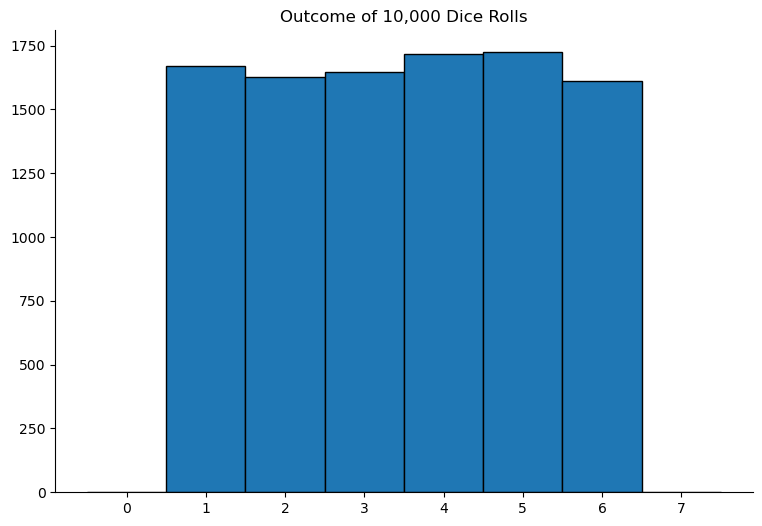

In [22]:
#set number of trials
n = 10000

#x holds the values for the simulation
x = die_distribution.rvs(n)

plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of {n:,} Dice Rolls')

In [23]:
#use PMF to find the probability that a roll equals 3
die_distribution.pmf(3)

0.16666666666666666

In [24]:
#use a CDF to find the probability that a roll is 3 or lower (is inclusive)
die_distribution.cdf(3)

0.5

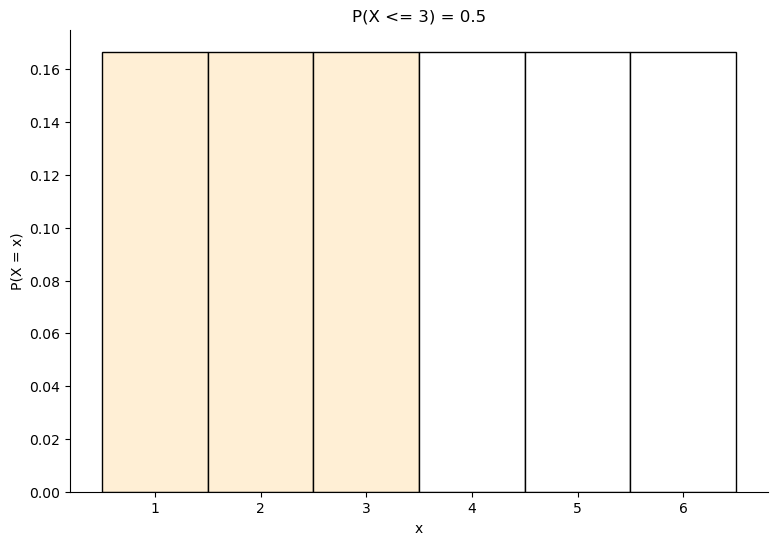

In [25]:
#example visualization
viz.distributions_example1(die_distribution)

In [30]:
#use a PPF to find the value associated with 5/6
die_distribution.ppf(5/6)
#huh

5.0

In [26]:
#use a survival function to find the likelihood of a dice roll being greater than 4 (not inclusive)
die_distribution.sf(4)

0.33333333333333337

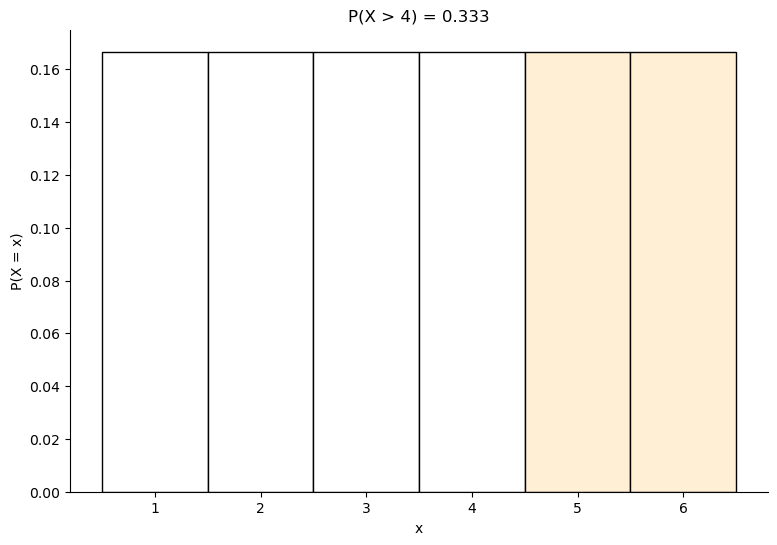

In [27]:
#example visualization
viz.distributions_example2(die_distribution)

### Inverse Survival Function

#### Start with a probability

- p = 1/3
- What is the value that we have a 1/3 chance of being higher than

In [31]:
die_distribution.isf(1/3)

4.0

### Binomial Distributions

- Two outcomes
- Use the probability of success
- Number of trials

A 30 question test
P(correct answer) = .25 = 1/4
P(incorrect answer) = .75 = 3/4

In [35]:
stats.binom(30, .25).sf(10)

0.10572812269266013

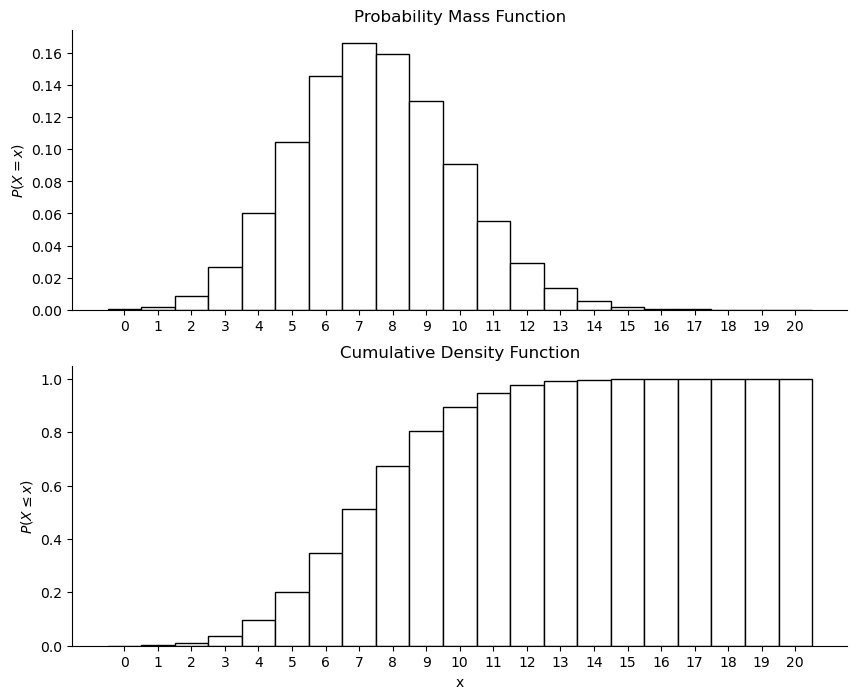

In [36]:
viz.distributions_example3()


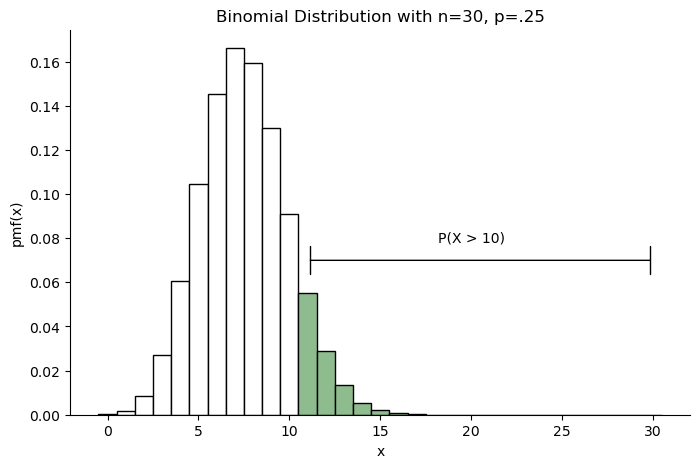

In [37]:
viz.distributions_example4()


In [38]:
#Two Outcomes
#Codeup student is late
#Codeup student is on time
#class of 20
#p(late)= .05
#p(on time)= .95

#20 people on time / 0 people late
stats.binom(20, .05).pmf(0)


0.3584859224085419

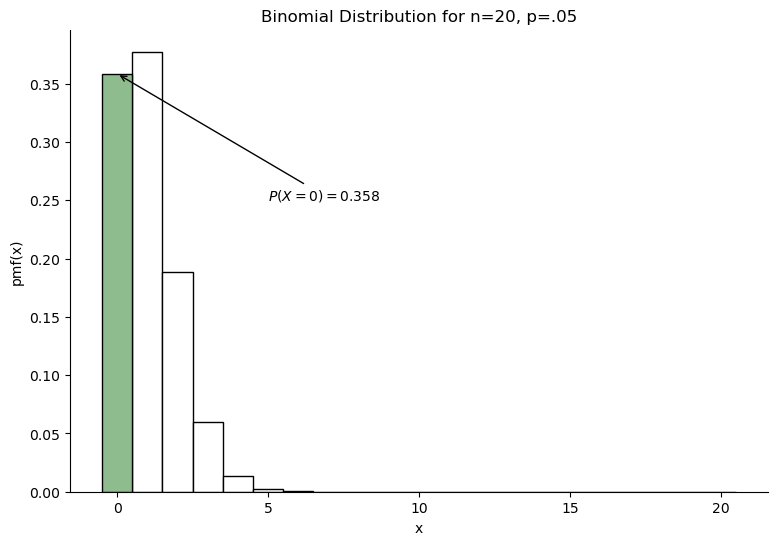

In [39]:
viz.distributions_example5()

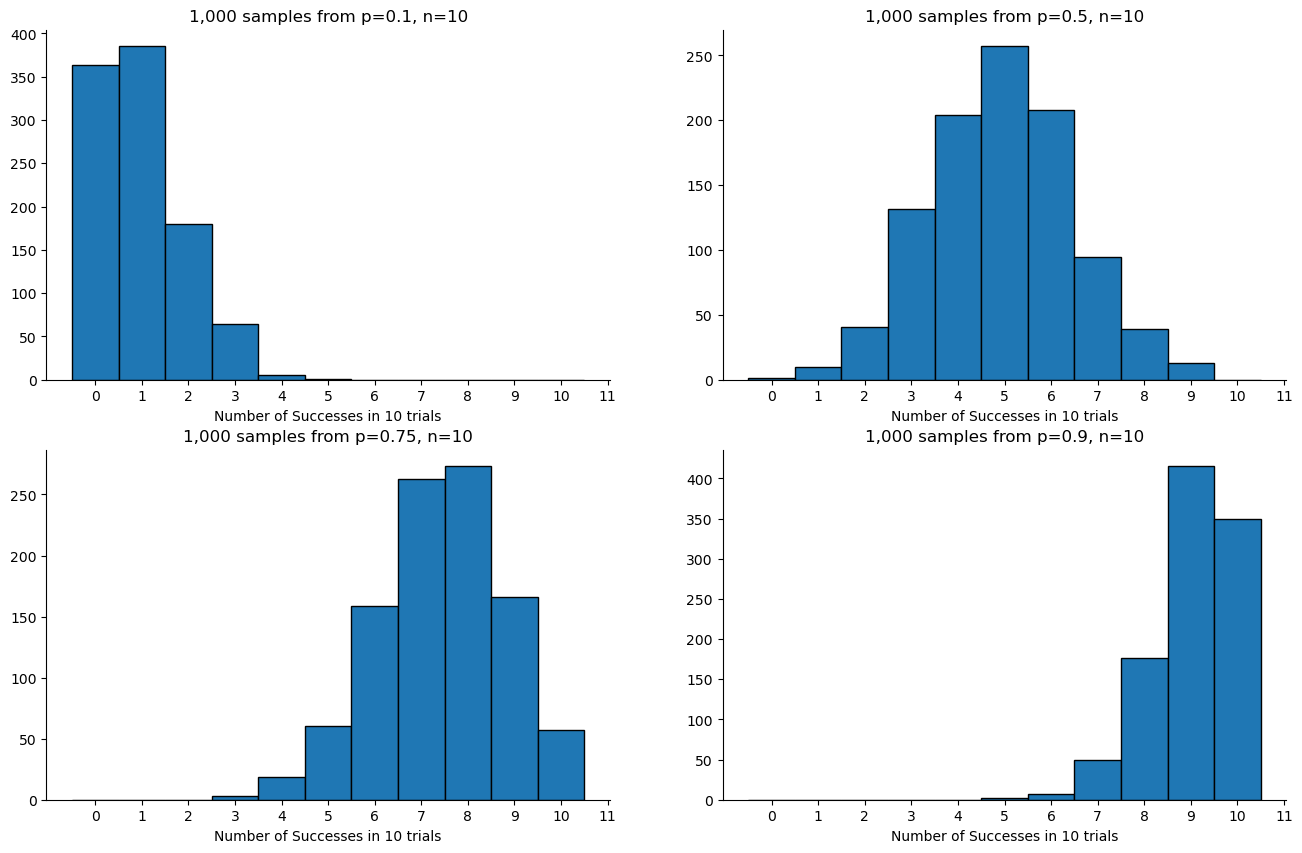

In [40]:
viz.distributions_example6()

In [44]:
#mean 
#option + m = µ
m = 12000

#standard deviation 
s = 2000

#defining the normal distribution
sales = stats.norm(m, s)

#using ppf to find the cutoff
#where 90% of the data is less than the cutoff
top_10_percent_cutoff = sales.ppf(.9)

print('${:,.2f}'.format(top_10_percent_cutoff))

$14,563.10


In [43]:
μ = 12000
σ = 2000

sales = stats.norm(μ, σ)

top_10_percent_cutoff = sales.ppf(.9)

print('${:,.2f}'.format(top_10_percent_cutoff))


$14,563.10


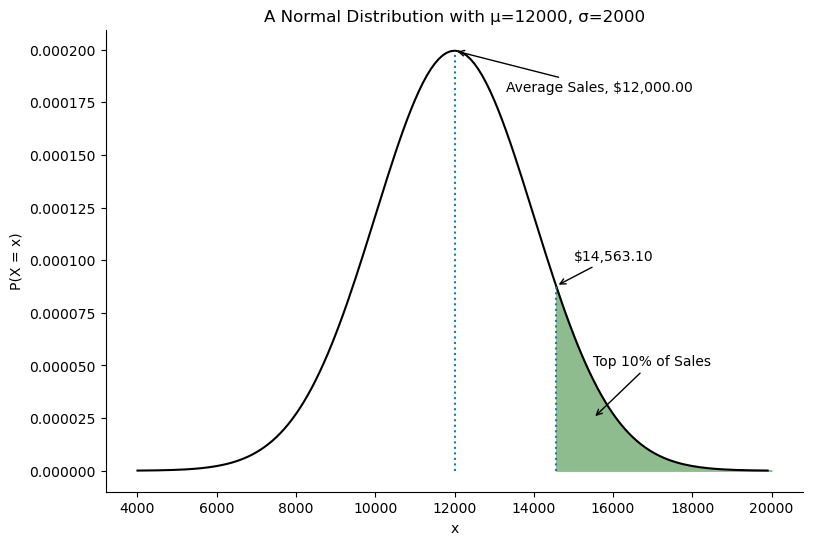

In [45]:
viz.distributions_example7(μ, σ)


In [46]:
#find the probability < 10_000

#cumulative distribution
p = sales.cdf(10_000)

print(f'Ony any given day, there\'s a {p:.1%} chance we sell less than $10,000.')

Ony any given day, there's a 15.9% chance we sell less than $10,000.


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

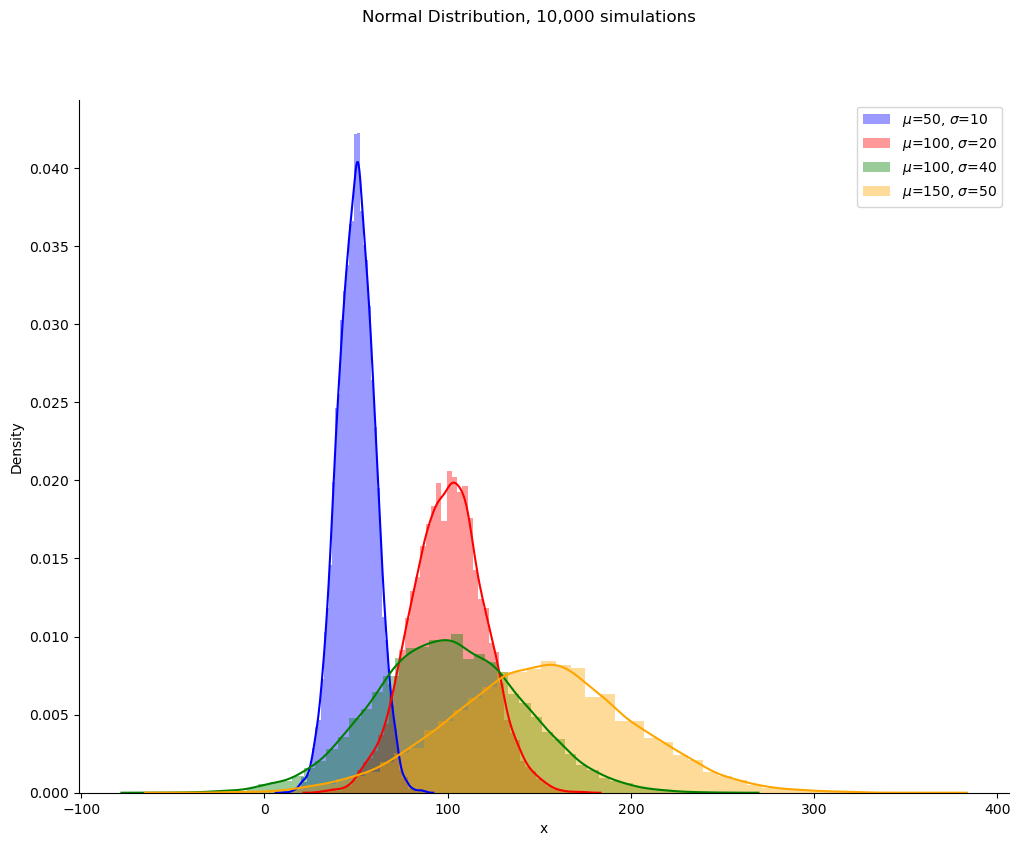

In [47]:
viz.distributions_example8()
